In [7]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = "svg"
import matplotlib.pyplot as plt

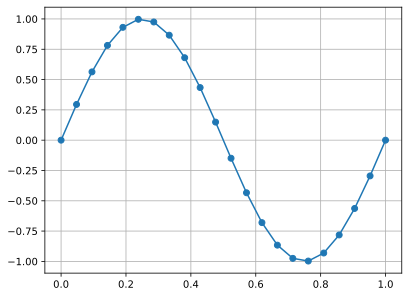

In [29]:
# define no of grid points in space
n  = 22
L = 1.0
x = np.linspace(0,L,n)
dx = x[1] -x[0]

#initial condition
U0 = np.sin(2.0*np.pi*x)
plt.plot(x,U0,'-o',markersize=6)
plt.grid()



In [17]:
#time domain 
dt = 0.01
tend = 10
mu = 1e-2 #thermal diffusibility 

sol =[]
sol.append(U0)
t=0.0
#lets move in time
while t < tend:
    un = sol[-1]  #grab sol at time lvl n
    #new array for the sol at n+1 (np1)
    unp1 = np.zeros_like(un)
    #we need unp1 only at interior points
    unp1[1:-1] = un[1:-1] + mu*dt/dx/dx * (-2*un[1:-1])
    
